# statistics

## repeated measures ANOVA

In [2]:
from gradecc.compute.measures import get_measures

df = get_measures()

Reading data from /Users/qasem/Dropbox/JasonANDQasem_SHARED/codes/gradients-rl-task/data/measures.csv


In [3]:
from gradecc.stats.repeated_measures import rm_anova

df_stats = rm_anova(df)
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']

In [4]:
# df_stats_ecc

In [5]:
from gradecc.plot import plot_cortex

# plot_cortex(df_stats_ecc, 'F', color_range=(1, 10),)

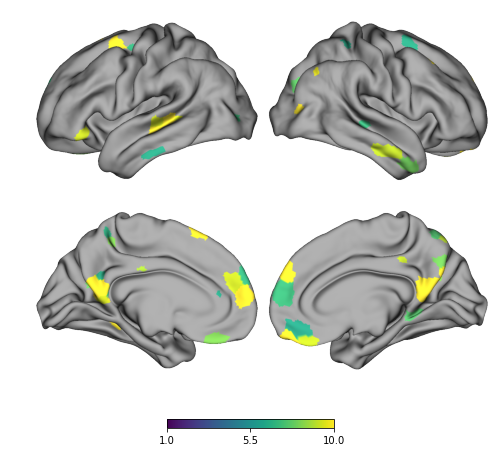

In [6]:
plot_cortex(df_stats_ecc, 'F', 'pvalue_corrected',
           color_range=(1, 10), layout='grid')

In [7]:
# think of multilevel anova. each region has four values.

In [8]:
# loosen the FDR criteria

In [9]:
df_stats_ecc.fdr_significant.sum()

57

In [10]:
df_stats_ecc[df_stats_ecc.fdr_significant == True].region.tolist()

['7Networks_LH_Cont_Cing_8',
 '7Networks_LH_Default_PFC_19',
 '7Networks_LH_Default_PFC_23',
 '7Networks_LH_Default_PFC_27',
 '7Networks_LH_Default_PFC_30',
 '7Networks_LH_Default_PFC_46',
 '7Networks_LH_Default_PFC_8',
 '7Networks_LH_Default_Temp_13',
 '7Networks_LH_Default_Temp_17',
 '7Networks_LH_Default_Temp_18',
 '7Networks_LH_Default_Temp_19',
 '7Networks_LH_Default_Temp_21',
 '7Networks_LH_Default_Temp_3',
 '7Networks_LH_Default_pCunPCC_1',
 '7Networks_LH_Default_pCunPCC_10',
 '7Networks_LH_Default_pCunPCC_12',
 '7Networks_LH_Default_pCunPCC_2',
 '7Networks_LH_Default_pCunPCC_3',
 '7Networks_LH_Default_pCunPCC_4',
 '7Networks_LH_Default_pCunPCC_5',
 '7Networks_LH_Default_pCunPCC_7',
 '7Networks_LH_DorsAttn_FEF_5',
 '7Networks_LH_DorsAttn_FEF_6',
 '7Networks_LH_Limbic_OFC_4',
 '7Networks_LH_Limbic_OFC_9',
 '7Networks_LH_Limbic_TempPole_10',
 '7Networks_LH_SalVentAttn_Med_13',
 '7Networks_LH_SalVentAttn_Med_16',
 '7Networks_LH_Vis_34',
 '7Networks_LH_Vis_5',
 '7Networks_RH_Cont_PF

In [11]:
from gradecc.stats.pairwise_ttests import ttests

df_stats_pairwise = ttests(df)

Computing ttests...


100%|██████████| 4990/4990 [00:55<00:00, 89.42it/s]


In [12]:
df_stats_pairwise

region     tstat  \
measure      A        B                                           
eccentricity baseline early  7Networks_LH_Cont_Cing_1 -1.069508   
                      early  7Networks_LH_Cont_Cing_2 -0.062160   
                      early  7Networks_LH_Cont_Cing_3  0.462466   
                      early  7Networks_LH_Cont_Cing_4  0.124356   
                      early  7Networks_LH_Cont_Cing_5 -1.501729   
...                                               ...       ...   
gradient4    early    late        7Networks_RH_Vis_79  0.184538   
                      late         7Networks_RH_Vis_8  0.870070   
                      late        7Networks_RH_Vis_80  0.735702   
                      late        7Networks_RH_Vis_81  0.445670   
                      late         7Networks_RH_Vis_9  0.272611   

                             pvalue_corrected  
measure      A        B                        
eccentricity baseline early          0.432339  
                      early          0.991681  
                      early          0.832691  
                      early          0.968013  
                      early          0.387877  
...                                       ...  
gradient4    early    late           0.854083  
                      late           0.640765  
                      late           0.464176  
                      late           0.657102  
                      late           0.785891  

[14970 rows x 3 columns]

In [13]:
df_ecc_pairs = df_stats_pairwise.xs('eccentricity', level=0)

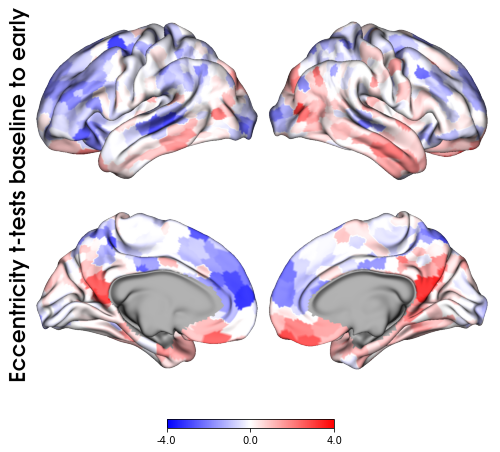

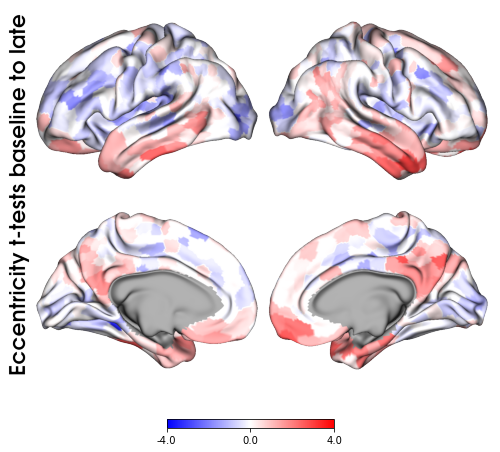

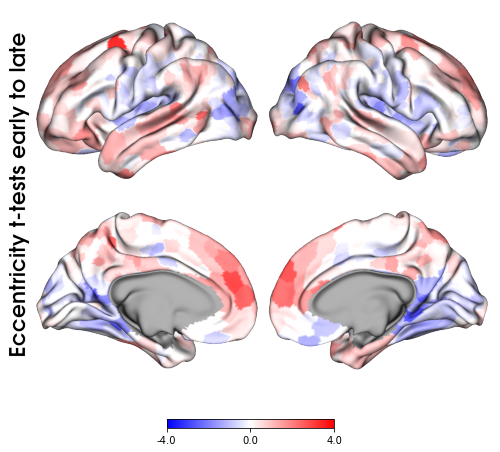

In [15]:
for pair in df_ecc_pairs.index.unique():
    text = 'Eccentricity t-tests ' + pair[0] + ' to ' + pair[1]
    plot_cortex(df_ecc_pairs.loc[pair], 'tstat',
           text=text, color_range=(-4, 4), color_map='bwr', layout='grid', save_figure=True)

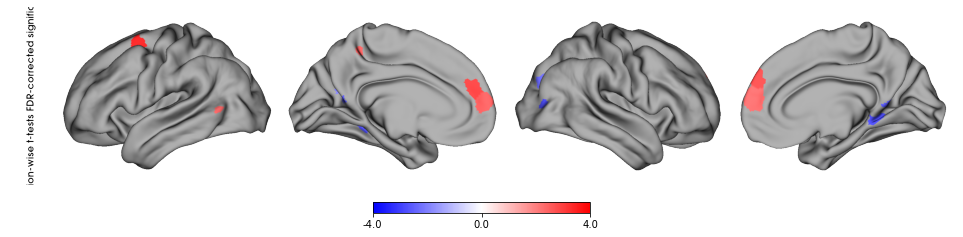

In [16]:
# masked for FDR corrected pvalue
plot_cortex(df_ecc_pairs.loc[pair], 'tstat', 'pvalue_corrected',
                  text='region-wise t-tests FDR-corrected significant',
                  color_range=(-4, 4), color_map='bwr')

In [17]:
# these areas show expansion vs contraction